# Task -1 Anomaly detection
## Student ID1: *********
## Student ID2:

In [1]:
%pip install oletools

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
import warnings

In [56]:
# file path - this for linux windows you will need "//"
f_path = "conn_attack.csv"
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This fea
ture represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [4]:
# drops nan values in the dataset
df

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169


Checks for missing data

In [7]:
# calculates the missing data precentage
df.apply(lambda x: sum(x.isna()) / len(df))

record ID    0.0
duration_    0.0
src_bytes    0.0
dst_bytes    0.0
dtype: float64

Result: No data is missing

In [9]:
df.shape # gets details about the num of rows and columns of our dataset 

(256670, 4)

## Data Overview & Exploration

In [10]:
df.head() # checks how our dataset looks like

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


Data fields

record ID - The unique identifier for each connection record.
Duration_ - This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes - This field represents the number of data bytes transferred from the source to the destination (i.e., the number of outgoing bytes from the host).
dst_bytes - This feature represents the number of data bytes transferred from the destination to the source (i.e., the number of bytes received by the host).

In [11]:
df.describe() # general statistics about the dataset

,record ID,duration_,src_bytes,dst_bytes
count,256670.000000,256670.000000,256670.000000,2.566700e+05
mean,128335.500000,0.640936,474.247898,4.473533e+03
std,74094.391134,15.627170,3391.106084,2.080903e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,64168.250000,0.000000,217.000000,6.600000e+02
50%,128335.500000,0.000000,249.000000,1.661000e+03
75%,192502.750000,0.000000,306.000000,4.341000e+03
max,256670.000000,3289.000000,54540.000000,7.068759e+06


In [12]:
# caluculates and stores the median and the std of each feature 

median_duration = df['duration_'].median()
print(f"median_duration: {median_duration:.2f}")

std_duration = df['duration_'].std()
print(f"std_duration: {std_duration:.2f}")

median_src_b = df['src_bytes'].median()
print(f"median_src_b: {median_src_b:.2f}")

std_src_b = df['src_bytes'].std()
print(f"std_src_b: {std_src_b:.2f}")

median_dst_b = df['dst_bytes'].mean()
print(f"median_dst_b: {median_dst_b:.2f}")

std_dst_b = df['dst_bytes'].std()
print(f"std_dst_b: {std_dst_b:.2f}")

total_smaples = df.count()
print(f"total_smaples: {total_smaples[0]}")

median_duration: 0.00
std_duration: 15.63
median_src_b: 249.00
std_src_b: 3391.11
median_dst_b: 4473.53
std_dst_b: 20809.03
total_smaples: 256670


In [13]:
# calculates the suspected share of outliers in the dataset
contamination = df[df['src_bytes'] > (median_src_b + std_dst_b)].count() / total_smaples
print(f"The contamination is: {contamination[0]:.08f}")
# calculates the percentage of samples in which the data sent exceeded its mean + std
percentage = df[df['src_bytes'] > (median_src_b + std_dst_b)].count() / total_smaples * 100
print(f"The percentage of samples in which the data sent exceeded its mean + std is: {percentage[0]:.08f}%")
df[df['src_bytes'] > (median_src_b + std_dst_b)]

The contamination is: 0.00395060
The percentage of samples in which the data sent exceeded its mean + std is: 0.39505980%


,record ID,duration_,src_bytes,dst_bytes
140814,140815,0,54540,8314
140815,140816,0,54540,8314
140816,140817,0,54540,8314
140817,140818,0,54540,8314
140818,140819,0,54540,8314
...,...,...,...,...
232764,232765,0,54540,8314
232765,232766,0,54540,8314
232766,232767,0,54540,8314
232767,232768,0,54540,8314


In [14]:
df[df['src_bytes'] > (median_src_b + std_dst_b)].describe() # let's describe our results

,record ID,duration_,src_bytes,dst_bytes
count,1014.000000,1014.000000,1014.000000,1014.000000
mean,150139.820513,0.141026,54254.082840,8206.328402
std,24259.625179,1.220439,2101.760736,695.781481
min,140815.000000,0.000000,26280.000000,0.000000
25%,141069.250000,0.000000,54540.000000,8314.000000
50%,143045.500000,0.000000,54540.000000,8314.000000
75%,143299.750000,0.000000,54540.000000,8314.000000
max,232769.000000,14.000000,54540.000000,8315.000000


In [15]:
'''
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
'''
#skewness and kurtosis
print("Skewness: %f" % df['src_bytes'].skew())
print("Kurtosis: %f" % df['src_bytes'].kurt()) # positive show long tail , negative light tail

Skewness: 15.824471
Kurtosis: 248.739606


Skewness: 207.100418
Kurtosis: 61028.785029


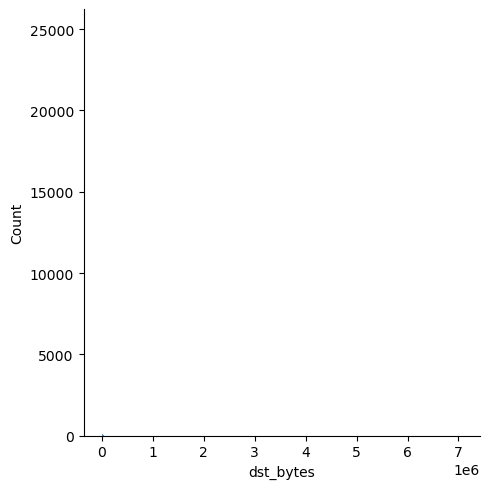

In [16]:
sns.displot(df['dst_bytes'])
print("Skewness: %f" % df['dst_bytes'].skew())
print("Kurtosis: %f" % df['dst_bytes'].kurt())

<AxesSubplot:xlabel='dst_bytes', ylabel='src_bytes'>

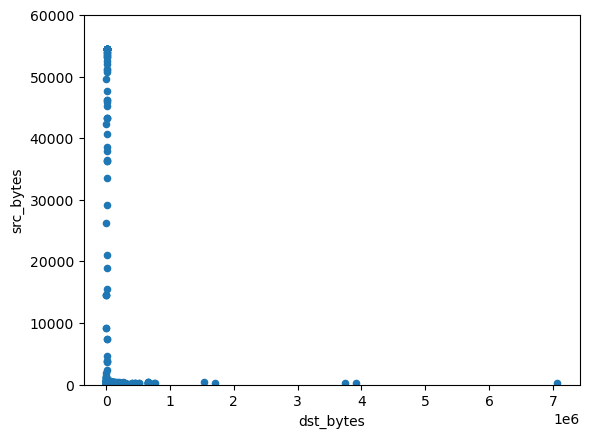

In [17]:
# relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,60000))

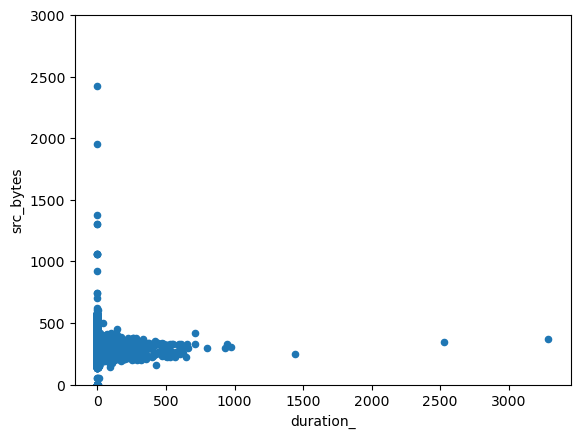

In [18]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,3000));

In [19]:
df.corr() 

,record ID,duration_,src_bytes,dst_bytes
record ID,1.000000,0.027244,0.019209,-0.002970
duration_,0.027244,1.000000,-0.001714,-0.005791
src_bytes,0.019209,-0.001714,1.000000,0.010770
dst_bytes,-0.002970,-0.005791,0.010770,1.000000


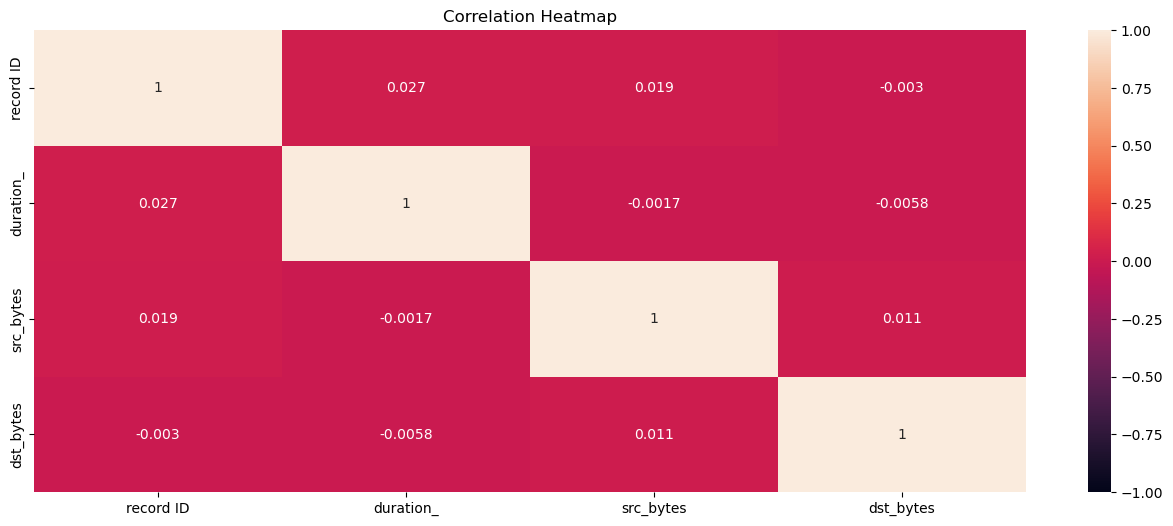

In [20]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

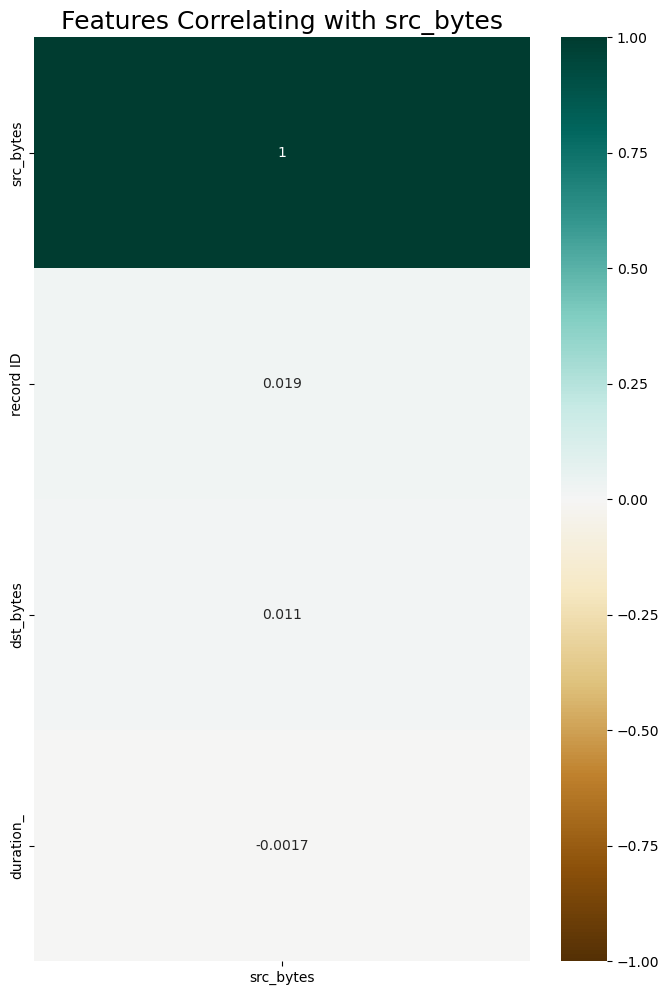

In [21]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});

Back to the task
Summary of data exploration:

* Did this help you?
* What did you find?
* What the data exploration tell you about the data and the possible attacks?

# Machine Learning Algorithms

### Algorithm: Isolation Forest

In [102]:
# calculates the suspected share of outliers in the dataset
num_of_suspected_outliers = df[df['src_bytes'] > (median_src_b + std_dst_b)].count() 
estimte_contamination = num_of_suspected_outliers / total_smaples
estimte_contamination = estimte_contamination[0]
print(estimte_contamination)
n_estimators = 50
data = df[["duration_", "src_bytes","dst_bytes"]]

# trains the model 
model = IsolationForest(contamination = estimte_contamination, n_estimators = n_estimators)
model.fit(data)

0.003950598044181244


/Users/liozakirav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.003950598044181244, n_estimators=50)

In [103]:
# predicts
df["is_anomaly?_"] = pd.Series(model.predict(data))
# maps the predictions from 1->0 and from -1->1
df["is_anomaly?_"] = df["is_anomaly?_"].map({1:0, -1:1})

In [104]:
# counts the number of anomalies that we got
anomaly = df["is_anomaly?_"].value_counts()[1]
print(anomaly)

1010


### Exports results to CSV

In [109]:
selectlist = ['record ID', 'is_anomaly?_']
datatowrite = df[selectlist]
datatowrite.to_csv('results.csv', index=False)